Kynan Ly (https://github.com/TAPoR-3-Tools/Tapor-Coding-Tools/blob/master/tapor_coding_tools/visualization/Multiple%20correspondence%20analysis%20and%20content%20analysis/Multiple%20Correspondence%20Analysis%20and%20Content%20Analysis.ipynb)

In [32]:
# Import helper libraries
import os
import nltk
import csv
import math

# Import panda / panda related content 
import pandas as pd
from pandas import read_table
import numpy as np

# Import MCA and matplot
from mca import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ensure we can see plots inside Jupyter notebook
%matplotlib inline


In [33]:
# Set path to the file with novels
path = "./Clean"

# Save all the titles of the texts
textName = []

# Save all the content of the texts
textContent = []

# Go to the directory with all the text files
for filename in os.listdir(path):
    
    # Add the file name and remove the file type and CLEAN designation (in this case ".txt")
    textName.append(filename[:-9])
    
    # Open each file and add all the content 
    with open(path + '/' + filename, "r", encoding="utf8") as file:
         fileContent = file.read()

    # Add the content of the file
    textContent.append(fileContent)

In [34]:
# Define cleaning tokenize function
def cleaning_tokenize_Text(text):
    # Tokenize the text and set it to lower case
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove all non-words
    tokens = [word for word in tokens if word[0].isalpha()]
    return tokens

In [35]:
# List to hold the results
text_clean_tokenized = []

# Token count for z-index 3d model
token_count = []

# Iterate through all the text
for novel in textContent:
    # Clean the text
    text_clean_tokenized.append(cleaning_tokenize_Text(novel))
    token_count.append(len(novel))

print(token_count)

[453625, 191496, 149332, 192254, 1294221, 293612, 214209, 292162, 1509976, 531002]


In [36]:
# General Inquirer Categories: http://www.wjh.harvard.edu/~inquirer/spreadsheet_guide.htm
# The csv name of the inquirer dictionary
csvFile = "inquirerbasic.csv"

# Create a list of rows to hold the values
listOfRows = []

# Reading the csv 
with open(csvFile, 'r') as file: # This makes sure that file is closed after reading
    data = csv.reader(file)
    
    # For every row in the file save it
    for row in data:
        listOfRows.append(row)

# Close the file
file.closed

# Format the category
categories = listOfRows[0]

# We do not need the first 2 category (they have the word, and the source of it)
# The last two columns are description of the words in question. We also do not need that
# Note the csv also as additional 4 empty columns at the end (that is why we have -6)
categories = categories[2:len(categories)-6]

# Check on how many categories
print("Length of category " + str(len(categories)))

# Print out the first 5 categories
print(categories[:5])

Length of category 182
['Positiv', 'Negativ', 'Pstv', 'Affil', 'Ngtv']


General Inquirer Category Helper Functions
Below are helper functions that help categorize the tokenized text in the corresponding categories.

In [37]:
# Set all the categories of a word into a set if that word did not exist already
def new_attribute_set(row):
    # The reason for a set because it is faster to load
    attributeSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            attributeSet.add(element)
    return attributeSet;

# Combine with pre-existing set with any new additions
def combine_attribute_set(row, oldset):
    # The reason for a set because it is faster to load
    newSet = set()
    
    # If you belong to a category add it into the set
    for element in row:
        if element != "":
            newSet.add(element)
    
    # Return a new updated set
    return (oldset | newSet)

# Assign every word with the categories (in a set)
def get_dictionary_list(listOfRows,categories):
    returnDict = {}

    # For every row create the set of categories that belong to it
    for row in listOfRows:
        
        # Reduce the word to the base. This is because the csv has LOVE#1, LOVE#2 to symbolize different meanings
        # In this anaylsis we are going to collapse them together
        word = row[0].split("#", 1)[0]
    
        # Check to see if the word is in the dictionary already
        if word in returnDict:
            returnDict[word] = combine_attribute_set(row[2:len(categories)-2], returnDict[word])
        else:
            returnDict[word] = new_attribute_set(row[2:len(categories)-2])
        
    return returnDict

# Creates the columns we need and fills them with how many of each category the text belongs to
def update_values_category(dataframe):
    # Finds and counts all the categories it belongs to
    resultDictionary = find_category(dataframe["tokens"])
    # Iterate through the results
    for k, v in resultDictionary.items():
        # Create columns for every category
        dataframe[k] = v
    return dataframe

# Looks through the tokens and increments the appropriate categories that it belongs to
def find_category(tokens):
    # Set all categories to 0 as default
    GICategories = {el:0 for el in categories}
    # Iterate through all tokens
    for element in tokens:
        # If it exists increment the value
        if element.upper() in dictWords:
            inside = dictWords[element.upper()]
    
            # Increment the category
            for element in inside:
                GICategories[element] += 1
    
    return GICategories

In [38]:
# Create dictionary of words and their respective categories
dictWords = get_dictionary_list(listOfRows[1:], categories)

# Have a look at the dictionary
dictWords

{'ABIDE': {'Active', 'Affil', 'Doctrin', 'IAV', 'Positiv'},
 'ABILITY': {'ABS', 'Abs@', 'EVAL', 'MeansLw', 'Positiv', 'Strong', 'Virtue'},
 'ABLE': {'EVAL', 'MeansLw', 'Positiv', 'Pstv', 'Strong', 'Virtue'},
 'ABOUND': {'IAV', 'Increas', 'Passive', 'Positiv'},
 'ABSOLVE': {'Active', 'ComForm', 'IAV', 'Positiv', 'SocRel'},
 'ABSORBENT': {'Increas', 'IndAdj', 'Positiv'},
 'ABSORPTION': {'Affil', 'Increas', 'Positiv'},
 'ABUNDANCE': {'ECON',
  'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ABUNDANT': {'Ovrst',
  'Positiv',
  'Pstv',
  'Quan',
  'Strong',
  'WltOth',
  'WltTot'},
 'ACCEDE': {'Active',
  'Affil',
  'ComForm',
  'IAV',
  'Positiv',
  'PowGain',
  'PowTot'},
 'ACCENTUATE': {'Active', 'IAV', 'Ovrst', 'Positiv'},
 'ACCEPT': {'IAV', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel', 'Submit'},
 'ACCEPTABLE': {'EVAL', 'PosAff', 'Positiv', 'Pstv', 'Virtue'},
 'ACCEPTANCE': {'Affil', 'Passive', 'PosAff', 'Positiv', 'Pstv', 'SocRel'},
 'ACCESSIBLE': 

In [39]:
# Create a dataframe to store all the values
MCA_Dataframe = pd.DataFrame(index=textName)

# Insert the tokenized data
MCA_Dataframe.insert(loc=0, column='tokens', value=text_clean_tokenized)

# Count the number of times each category appears in the text based on the their tokens
MCA_Dataframe = MCA_Dataframe.apply(update_values_category, axis=1)

# Remove the tokens frame as we are done with it now
MCA_Dataframe = MCA_Dataframe.drop("tokens", axis=1)

# Replace any empty cell with 0
MCA_Dataframe = MCA_Dataframe.fillna(0)

# Have a look at what the dataframe looks like
MCA_Dataframe

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Berkeley_Alciphron,8421,4771,7833,3990,4210,3057,10120,5832,3429,2017,...,1277,216,22,631,1209,3549,0,0,0,0
Berkeley_HumanKnowledge,2629,1705,2424,1557,1563,1068,3741,2076,1440,842,...,440,57,1,168,244,1600,0,0,0,0
Berkeley_TheoryOfVision,1698,1447,1583,1057,1384,965,2626,1332,1027,525,...,228,47,0,112,139,1047,0,0,0,0
Berkeley_ThreeDialogues,2939,2015,2862,1582,1880,1321,3848,2036,1482,919,...,248,22,5,292,352,1794,0,0,0,0
Hume_EssaysMoralPoliticalLiterary,19011,12146,16393,9061,9951,7032,27681,15203,9315,3893,...,2572,1602,77,1396,1962,7736,0,0,0,0
Hume_HumanUnderstanding,4534,2759,3953,2094,2446,1694,6356,3116,1983,934,...,536,55,12,243,392,2137,0,0,0,0
Hume_NaturalReligion,3286,2265,2955,1610,1998,1361,5165,2463,1713,717,...,384,77,23,301,416,1649,0,0,0,0
Hume_SourcesofMorals,5654,3145,5095,2946,2595,1772,6074,3186,2158,970,...,748,79,11,386,821,1972,0,0,0,0
Locke_HumanUnderstanding,22593,13884,20992,14780,12782,8572,33213,18368,12848,7526,...,3753,545,20,1459,2123,11644,0,0,0,0
Locke_TwoTreatises,7804,4396,6706,5016,3733,3096,14498,10502,4450,2226,...,1639,171,12,435,751,4210,0,0,0,0


In [40]:
# Divide each cell by the sum of the row
MCA_Dataframe.loc[:,:] = MCA_Dataframe.loc[:,:].div(MCA_Dataframe.sum(axis=1), axis=0)

# See the results
MCA_Dataframe

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
Berkeley_Alciphron,0.027293,0.015463,0.025387,0.012932,0.013645,0.009908,0.032800,0.018902,0.011114,0.006537,...,0.004139,0.000700,0.000071,0.002045,0.003918,0.011503,0.0,0.0,0.0,0.0
Berkeley_HumanKnowledge,0.022474,0.014575,0.020722,0.013310,0.013361,0.009130,0.031980,0.017747,0.012310,0.007198,...,0.003761,0.000487,0.000009,0.001436,0.002086,0.013678,0.0,0.0,0.0,0.0
Berkeley_TheoryOfVision,0.018405,0.015684,0.017158,0.011457,0.015001,0.010460,0.028464,0.014438,0.011132,0.005691,...,0.002471,0.000509,0.000000,0.001214,0.001507,0.011349,0.0,0.0,0.0,0.0
Berkeley_ThreeDialogues,0.023532,0.016134,0.022915,0.012667,0.015053,0.010577,0.030810,0.016302,0.011866,0.007358,...,0.001986,0.000176,0.000040,0.002338,0.002818,0.014364,0.0,0.0,0.0,0.0
Hume_EssaysMoralPoliticalLiterary,0.025979,0.016598,0.022402,0.012382,0.013598,0.009610,0.037827,0.020776,0.012729,0.005320,...,0.003515,0.002189,0.000105,0.001908,0.002681,0.010572,0.0,0.0,0.0,0.0
Hume_HumanUnderstanding,0.026110,0.015889,0.022765,0.012059,0.014086,0.009755,0.036603,0.017944,0.011420,0.005379,...,0.003087,0.000317,0.000069,0.001399,0.002257,0.012307,0.0,0.0,0.0,0.0
Hume_NaturalReligion,0.024669,0.017004,0.022185,0.012087,0.015000,0.010218,0.038776,0.018491,0.012860,0.005383,...,0.002883,0.000578,0.000173,0.002260,0.003123,0.012380,0.0,0.0,0.0,0.0
Hume_SourcesofMorals,0.031298,0.017409,0.028204,0.016308,0.014365,0.009809,0.033623,0.017636,0.011946,0.005370,...,0.004141,0.000437,0.000061,0.002137,0.004545,0.010916,0.0,0.0,0.0,0.0
Locke_HumanUnderstanding,0.023426,0.014396,0.021766,0.015325,0.013253,0.008888,0.034437,0.019045,0.013322,0.007803,...,0.003891,0.000565,0.000021,0.001513,0.002201,0.012073,0.0,0.0,0.0,0.0
Locke_TwoTreatises,0.021869,0.012319,0.018792,0.014056,0.010461,0.008676,0.040628,0.029430,0.012470,0.006238,...,0.004593,0.000479,0.000034,0.001219,0.002105,0.011798,0.0,0.0,0.0,0.0


In [41]:
# Run MCA on the dataframe (first 10 columns)
mca_test = MCA(MCA_Dataframe.loc[:,:'Submit'], benzecri=False)

# Acquire the factor score for the Authors
Authors_Score = mca_test.fs_r().T

# Acquire the factor score for the Categories
Category_Score = mca_test.fs_c().T

# Returns the variance of each Axis 
Variance = mca_test.L

# Calculate the % variance of total
Variance_total = [Variance[0] / (Variance[0] + Variance[1]), Variance[1] / (Variance[0] + Variance[1])]

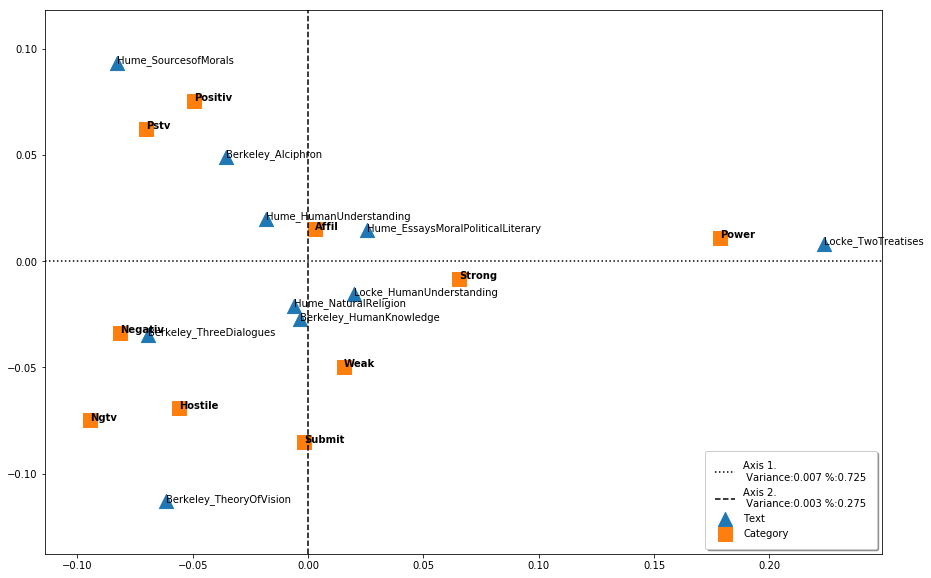

In [45]:
# Set the Author points to be represented by Triangles
plt.scatter(Authors_Score[0], Authors_Score[1], cmap='magma', s=200, marker = '^', label='Text')

# Set the Category points to be represented by Squares
plt.scatter(Category_Score[0], Category_Score[1], cmap='magma', s=200, marker = 's', label='Category')

# Set the size of the figure
plt.rcParams["figure.figsize"] = (15,10)

# Label each point for Author
for i, txt in enumerate(textName):
    plt.annotate(txt, (Authors_Score[0][i],Authors_Score[1][i]), fontsize = 10)

# Label each point for Category
for i, txt in enumerate(categories[:10]):
    plt.annotate(txt, (Category_Score[0][i],Category_Score[1][i]), fontsize = 10, fontweight='bold')
    
# Draw axis
Axis1_Label= "Axis 1. \n Variance:" + str(format(Variance[0], '.3f')) + " %:" + str(format(Variance_total[0], '.3f'))
Axis2_Label= "Axis 2. \n Variance:" + str(format(Variance[1], '.3f')) + " %:" + str(format(Variance_total[1], '.3f'))
plt.axhline(0, color='black',linestyle=':', label=Axis1_Label)
plt.axvline(0, color='black',linestyle='--', label=Axis2_Label)

# Set Legend
plt.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1)    

# Display Graph
plt.show()

In [43]:
# Store the Author and Titles in a variable with the correct coordinate for 3D Plot
author = []
for i, txt in enumerate(textName):
    x = []
    x = (Authors_Score[0][i], Authors_Score[1][i], txt)
    #print(xt)
    author.append(x)
    
print(author)

[(-0.035572568422943304, 0.04903008352493038, 'Berkeley_Alciphron'), (-0.0035930870880266775, -0.027273454657965147, 'Berkeley_HumanKnowledge'), (-0.06169220202844018, -0.11301519096656609, 'Berkeley_TheoryOfVision'), (-0.0694015063795252, -0.03474324883833164, 'Berkeley_ThreeDialogues'), (0.025509721600808596, 0.014574896546618666, 'Hume_EssaysMoralPoliticalLiterary'), (-0.018095838641188976, 0.019974288309358164, 'Hume_HumanUnderstanding'), (-0.00600697383727406, -0.02096898694877182, 'Hume_NaturalReligion'), (-0.0826742553289262, 0.09346329404102234, 'Hume_SourcesofMorals'), (0.01975177494625338, -0.01560867242466097, 'Locke_HumanUnderstanding'), (0.22373278405146257, 0.008102267288795909, 'Locke_TwoTreatises')]


In [44]:
# Store the Category Name in a variable with the correct coordinate for 3D Plot
category =[]
for i, txt in enumerate(categories[:10]):
    x = []
    x = (Category_Score[0][i], Category_Score[1][i], txt)
    category.append(x)
    
print(category)

[(-0.049496457557821116, 0.07543116950328528, 'Positiv'), (-0.08146304179164011, -0.033572298655297185, 'Negativ'), (-0.07008733097048081, 0.06222332958322159, 'Pstv'), (0.0027732695132246365, 0.01514502163300811, 'Affil'), (-0.09470032224275726, -0.0747922919735076, 'Ngtv'), (-0.05589470382677873, -0.06913855627601195, 'Hostile'), (0.06538764582895741, -0.008334391853689942, 'Strong'), (0.1787098378726594, 0.011021164776133711, 'Power'), (0.015508291089036967, -0.04953651897439848, 'Weak'), (-0.0015930656452828086, -0.08518395090023527, 'Submit')]


<IPython.core.display.Javascript object>


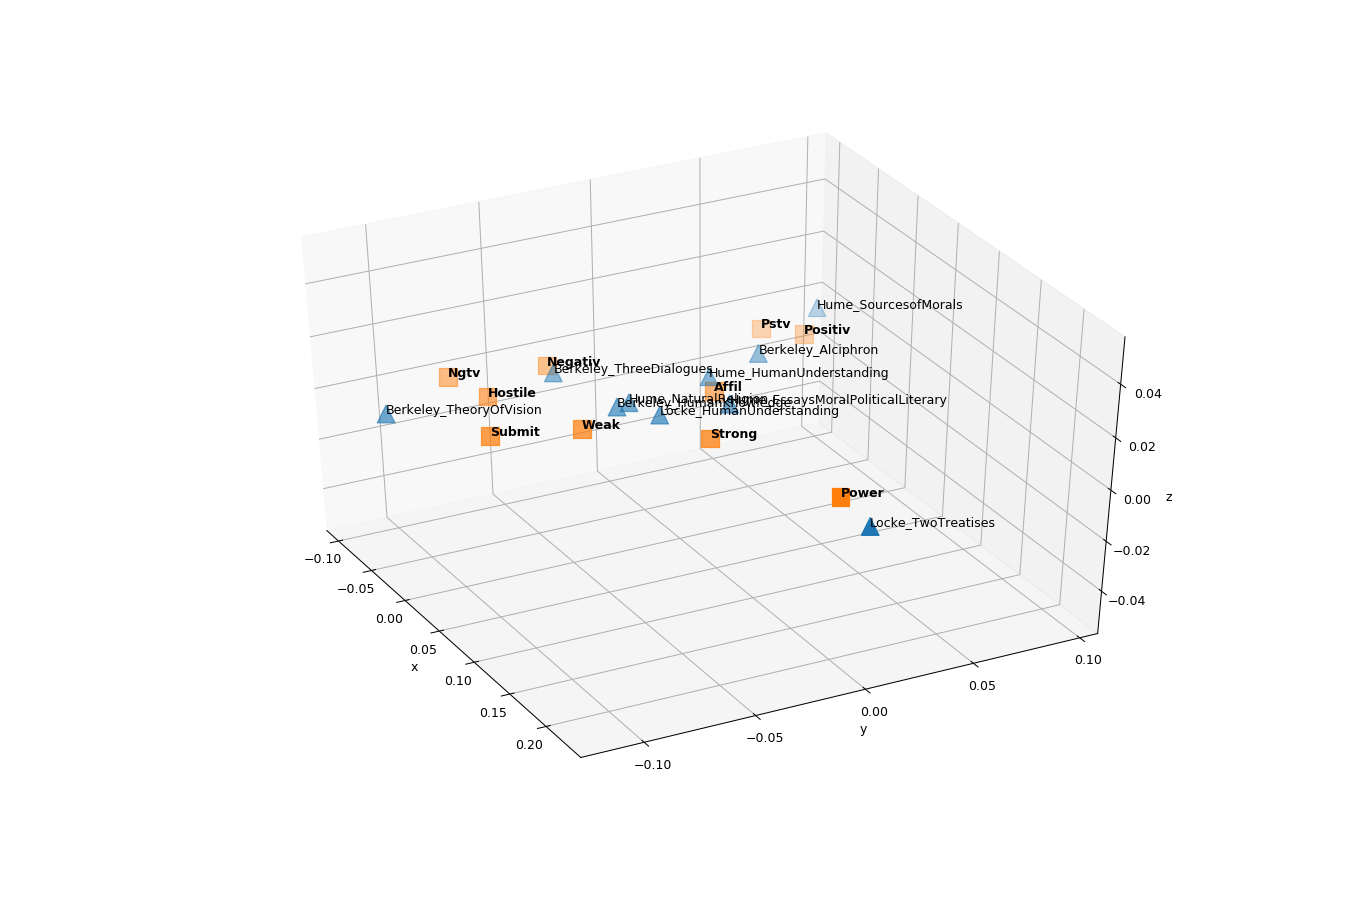

In [46]:
# Need to switch to notebook view, implement twice due to Jupyter bug
%matplotlib notebook
%matplotlib notebook

#3D Representation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Turn axis on and off
#ax.set_axis_off()

x = np.asarray(Authors_Score[0])
y = np.asarray(Authors_Score[1])
ax.scatter(x, y, cmap='magma', s=200, marker = '^', label='Text')

xC = np.asarray(Category_Score[0])
yC = np.asarray(Category_Score[1])
ax.scatter(xC, yC, cmap='magma', s=200, marker = 's', label='Category')

# Label each point for Author
for x, y, s in author:
    ax.text(x, y, 0, s, fontsize = 10)
    
# Label each point for Category
for x, y, s in category:
    ax.text(x, y, 0, s, fontsize = 10, fontweight='bold')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# rotate the axes (with mouse) and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)
    